# Set up

In [1]:
# update path with data dir
import sys
sys.path.append('../data/')

In [61]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting data

In [30]:
with open('./csvs/top_50_weekly_data.json') as f: 
    d = json.loads(f.read())

In [31]:
len(d)

1900

In [32]:
player_value_df = pd.read_csv('./csvs/player_value.csv', index_col=0)

In [51]:
first_team_value_arr = []
bench_value_arr = []

for i in range(0, len(d)):
    try:
        event_entry_d = d[i]
        first_team = [j for j in event_entry_d['picks'] if j['position'] in range(1, 12)]
        bench = [j for j in event_entry_d['picks'] if j['position'] not in range(1, 12)]

        first_team_value = \
        [player_value_df[
            (player_value_df['element'] == k['element'])
            & (player_value_df['event'] == k['event'])]['value'].values[0]
         for k in first_team]

        bench_value = \
        [player_value_df[
            (player_value_df['element'] == k['element'])
            & (player_value_df['event'] == k['event'])]['value'].values[0]
         for k in bench]

        first_team_value_arr.append(sum(first_team_value))
        bench_value_arr.append(sum(bench_value))
    except:
        continue
    
    


In [57]:
np.mean(first_team_value_arr)/11

75.89825852596663

In [59]:
np.mean(bench_value_arr)/4

49.467645381984035

In [73]:
len(bench_value_arr)

1754

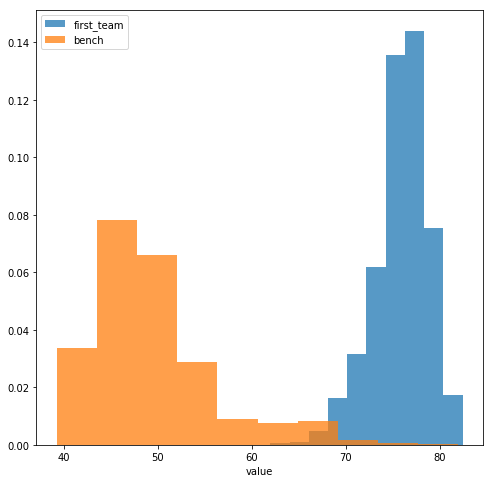

In [74]:
plt.figure(figsize=(8, 8))
plt.hist(pd.Series(first_team_value_arr)/11, alpha=0.75, label='first_team', density=True)
plt.hist(pd.Series(bench_value_arr)/4, alpha=0.75, label='bench', density=True)
plt.legend()
plt.xlabel('value')
plt.show()